In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import statsmodels.formula.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [2]:
after = pd.read_csv('../data_merge/after_data.csv')
after_data = after.drop(['Date','ETF'], axis=1)
after_target = after['ETF']
after

,Date,ETF,WTI,ExchangeRate,Gold,Pork,ITA
0,2021-11-01,10970,84.05,1177.5,67450,2393.0,105.36
1,2021-11-02,11175,83.91,1176.0,67760,2390.0,104.62
2,2021-11-03,11070,80.86,1183.5,67620,2376.0,105.46
3,2021-11-04,11000,78.81,1183.5,67400,2504.0,105.26
4,2021-11-05,10875,81.27,1184.5,68460,2515.0,108.96
...,...,...,...,...,...,...,...
93,2022-03-25,14535,113.90,1221.0,76670,2402.0,112.95
94,2022-03-28,14470,105.96,1225.0,76380,2393.0,111.43
95,2022-03-29,14350,104.24,1211.0,75440,2389.0,112.02
96,2022-03-30,14020,107.82,1210.5,74810,2367.0,112.24


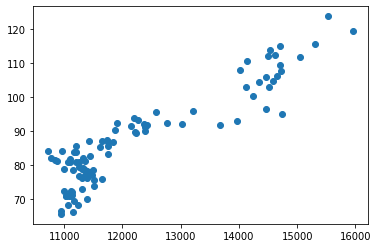

In [ ]:
plt.scatter(after['ETF'], after['WTI'])
plt.show()

In [ ]:
## regression use ols
lm = sm.ols('ETF ~ WTI + ExchangeRate + Gold + Pork + ITA', data=after)
res = lm.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ETF   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     300.2
Date:                Sun, 24 Apr 2022   Prob (F-statistic):           2.43e-55
Time:                        01:11:35   Log-Likelihood:                -710.23
No. Observations:                  98   AIC:                             1432.
Df Residuals:                      92   BIC:                             1448.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -2.806e+04   5795.659     -4.842      0.000   -3.96e+04   -1.66e+04
WTI             52.6581      7.480      7.040      0.000      37.802      67.514
ExchangeRate    18.2677      5.465      3.343      0.001       7.414      29.121
Gold             0.1908      0.034      5.644      0.000       0.124       0.258
Pork             1.1604      0.322      3.609      0.000       0.522       1.799
ITA            -24.4851     14.011     -1.748      0.084     -52.313       3.342
==============================================================================
Omnibus:                        1.741   Durbin-Watson:                   0.672
Prob(Omnibus):                  0.419   Jarque-Bera (JB):                1.749
Skew:                           0.308   Prob(JB):                        0.417
Kurtosis:                       2.782   Cond. No.                     1.17e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(lm.exog, i)} 
             for i, column in enumerate(lm.exog_names)
             if column != 'Intercept')

,컬럼,VIF
0,WTI,8.436889
1,ExchangeRate,5.531455
2,Gold,9.254870
3,Pork,2.051124
4,ITA,2.270697


In [13]:
# LinearRegression 1
after = pd.read_csv('../data_merge/after_data.csv')
after_data = after.drop(['Date','ETF'], axis=1)
after_target = after['ETF']
after
x_train, x_test, y_train, y_test = train_test_split(after_data,after_target,
                                test_size=0.2,
                                random_state=42)

lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)
print(f'mse : {mse} \nrmse : {rmse} \nr2 : {r2} \ncoef : {lr.coef_} \nintercept : {lr.intercept_}')

mse : 167831.6872192677 
rmse : 409.6726586181554 
r2 : 0.9283088735109364 
coef : [ 56.76701888  20.48174619   0.18904051   1.28955574 -32.49666537] 
intercept : -30427.253775855905


In [12]:
# LinearRegression 2
after = pd.read_csv('../data_merge/after_data.csv')
after_data = after.drop(['Date','ETF'], axis=1)
after_target = after['ETF']
after
x_train, x_test, y_train, y_test = train_test_split(after_data, after_target,
                                test_size=0.2,
                                random_state=42)

lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)
print(f'mse : {mse} \nrmse : {rmse} \nr2 : {r2} \ncoef : {lr.coef_} \nintercept : {lr.intercept_}')

mse : 167831.6872192677 
rmse : 409.6726586181554 
r2 : 0.9283088735109364 
coef : [ 56.76701888  20.48174619   0.18904051   1.28955574 -32.49666537] 
intercept : -30427.253775855905


In [14]:
## RandomForestRegressor
after = pd.read_csv('../data_merge/after_data.csv')
after_data = after.drop(['Date','ETF'], axis=1)
after_target = after['ETF']
after
x_train, x_test, y_train, y_test = train_test_split(after_data,after_target,
                                test_size=0.2,
                                random_state=42)

rf = RandomForestRegressor(n_estimators=400, max_depth=5)
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)
print(f'mse : {mse} \nrmse : {rmse} \nr2 : {r2}')

mse : 61820.93637474454 
rmse : 248.63816355246942 
r2 : 0.9735925161526627


In [11]:
## RandomForestRegressor2
after = pd.read_csv('../data_merge/after_data.csv')
after_data = after.drop(['Date','ETF'], axis=1)
after_target = after['ETF']
after
x_train, x_test, y_train, y_test = train_test_split(after_data,after_target,
                                test_size=0.2,
                                random_state=42)

rf = RandomForestRegressor(n_estimators=400, max_depth=5)
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)
print(f'mse : {mse} \nrmse : {rmse} \nr2 : {r2}')

mse : 62723.489725583095 
rmse : 250.44658058273245 
r2 : 0.9732069806944298


In [15]:
# KFold
after = pd.read_csv('../data_merge/after_data.csv')
after_data = after.drop(['Date','ETF'], axis=1)
after_target = after['ETF']
after

n_iter = 0 
accu = []
kfold = KFold(n_splits=3)
lr = LinearRegression()



for train_index, test_index in kfold.split(after_data):

    x_train, x_test = after_data.loc[train_index], after_data.loc[test_index]
    y_train, y_test = after_target.loc[train_index], after_target.loc[test_index]

    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    n_iter += 1
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, pred) 
    accu.append(r2)
    print(f'#{n_iter} \nmse : {mse} \nrmse : {rmse} \nr2 : {r2} \ncoef : {lr.coef_} \nintercept : {lr.intercept_}')

print(f'\nr2 mean : {np.mean(accu)}')

#1 
mse : 236498.65898902956 
rmse : 486.3112778756314 
r2 : -7.165248380771997 
coef : [47.38650411  5.86575736  0.24410464  1.25530876 18.15680795] 
intercept : -21245.387563245575
#2 
mse : 212361.09884617335 
rmse : 460.8265387824071 
r2 : -1.0004016753554077 
coef : [ 55.511962    30.20492781   0.09890732   0.1730181  -40.47835619] 
intercept : -31837.996787003634
#3 
mse : 2017158.5476068868 
rmse : 1420.2670691130197 
r2 : -0.9627312808321014 
coef : [ 33.28514676  18.42759485   0.06121301   0.4376221  -35.62522464] 
intercept : -14837.04927334755

r2 mean : -3.042793778986502


In [16]:
# MinMax, Standard 함수

def minmax(data):
    scaled = MinMaxScaler().fit_transform(data)
    return scaled

def standard(data):
    scaled = StandardScaler().fit_transform(data)
    return scaled

def logscale(data):
    scaled = np.log1p(data)
    return scaled

In [17]:
## normal
after = pd.read_csv('../data_merge/after_data.csv')
after_data = after.drop(['Date','ETF'], axis=1)
after_target = after['ETF']
after

print("\nNO Scaler")
x_train, x_test, y_train, y_test = train_test_split(after_data, after_target,
                                test_size=0.2,
                                random_state=123)

lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)
print(f'mse : {mse} \nrmse : {rmse} \nr2 : {r2} \ncoef : {lr.coef_} \nintercept : {lr.intercept_}')

## After MinMaxScaler
print("\nAfter MinMaxScaler")
x_train, x_test, y_train, y_test = train_test_split(after_data, after_target,
                                test_size=0.2,
                                random_state=123)

x_train_minmax = minmax(x_train)
x_test_minmax = minmax(x_test)

lr = LinearRegression()
lr.fit(x_train_minmax, y_train)
pred = lr.predict(x_test_minmax)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)
print(f'mse : {mse} \nrmse : {rmse} \nr2 : {r2} \ncoef : {lr.coef_} \nintercept : {lr.intercept_}')

## After StandarScaler
print("\nAfter StandarScaler")
x_train, x_test, y_train, y_test = train_test_split(after_data, after_target,
                                test_size=0.2,
                                random_state=123)

x_train_standard = standard(x_train)
x_test_standard = standard(x_test)

lr = LinearRegression()
lr.fit(x_train_standard, y_train)
pred = lr.predict(x_test_standard)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)
print(f'mse : {mse} \nrmse : {rmse} \nr2 : {r2} \ncoef : {lr.coef_} \nintercept : {lr.intercept_}')

## After log
print("\nAfter log")
x_train, x_test, y_train, y_test = train_test_split(after_data, after_target,
                                test_size=0.2,
                                random_state=123)

x_train_log = logscale(x_train)
x_test_log = logscale(x_test)

lr = LinearRegression()
lr.fit(x_train_log, y_train)
pred = lr.predict(x_test_log)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)
print(f'mse : {mse} \nrmse : {rmse} \nr2 : {r2} \ncoef : {lr.coef_} \nintercept : {lr.intercept_}')


NO Scaler
mse : 170436.78852597004 
rmse : 412.83990665386267 
r2 : 0.9179543593745983 
coef : [ 58.8643368   19.69367811   0.16831511   1.15740853 -31.94342942] 
intercept : -27924.552396522664

After MinMaxScaler
mse : 265225.3158055624 
rmse : 515.0003066072509 
r2 : 0.8723246246685404 
coef : [3168.66724976 1309.62959449 1967.60358108  687.50066411 -556.45454058] 
intercept : 9885.883250917166

After StandarScaler
mse : 179222.96968870607 
rmse : 423.3473392956498 
r2 : 0.9137248273094734 
coef : [ 823.49867084  298.82202001  521.3655063   184.98223533 -125.78463989] 
intercept : 12210.256410256414

After log
mse : 146193.7132875138 
rmse : 382.35286488728417 
r2 : 0.929624601790401 
coef : [ 4773.73914973 25799.77458086 13659.71941566  3129.99851121
 -3283.45791581] 
intercept : -353679.2887569525


In [ ]:
## Ridge 0.1
after = pd.read_csv('../data_merge/after_data.csv')
after_data = after.drop(['Date','ETF'], axis=1)
after_target = after['ETF']
after
x_train, x_test, y_train, y_test = train_test_split(after_data,after_target,
                                test_size=0.2,
                                random_state=42)

rg1 = Ridge(alpha=0.1)
rg1.fit(x_train, y_train)
pred = rg1.predict(x_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)
print(f'mse : {mse} \nrmse : {rmse} \nr2 : {r2}')

mse : 167822.1789487545 
rmse : 409.6610537368112 
r2 : 0.928312935071869


In [ ]:
## Ridge 0
after = pd.read_csv('../data_merge/after_data.csv')
after_data = after.drop(['Date','ETF'], axis=1)
after_target = after['ETF']
after
x_train, x_test, y_train, y_test = train_test_split(after_data,after_target,
                                test_size=0.2,
                                random_state=42)

rg = Ridge(alpha=0.1)
rg.fit(x_train, y_train)
pred = rg.predict(x_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)
print(f'mse : {mse} \nrmse : {rmse} \nr2 : {r2}')

mse : 167822.1789487545 
rmse : 409.6610537368112 
r2 : 0.928312935071869


In [ ]:
## Ridge 100
after = pd.read_csv('../data_merge/after_data.csv')
after_data = after.drop(['Date','ETF'], axis=1)
after_target = after['ETF']
after
x_train, x_test, y_train, y_test = train_test_split(after_data,after_target,
                                test_size=0.2,
                                random_state=42)

rg2 = Ridge(alpha=100)
rg2.fit(x_train, y_train)
pred = rg2.predict(x_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)
print(f'mse : {mse} \nrmse : {rmse} \nr2 : {r2}')

mse : 161075.18605917873 
rmse : 401.3417322671276 
r2 : 0.9311949863023702


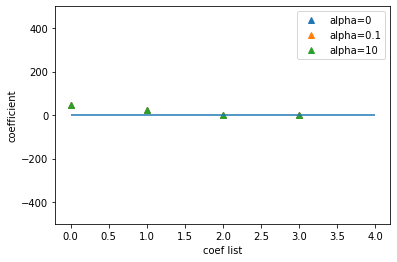

In [ ]:
plt.plot(rg.coef_, "^", label='alpha=0')
plt.plot(rg1.coef_, "^", label='alpha=0.1')
plt.plot(rg2.coef_, "^", label='alpha=10')
plt.xlabel('coef list')
plt.ylabel('coefficient')
plt.hlines(0,0, len(rg.coef_))
plt.ylim(-500,500)
plt.legend()
plt.show()